In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ..

/home/shibinbin/projects/exRNA


In [2]:
import seaborn as sns
sns.set()
import pandas as pd
from pandas import DataFrame, Series
import numba
from scipy import stats
import sys

In [6]:
peaks_locations = {}
for i, dataset in enumerate(['tissue', 'exRNA']):
    df = pd.read_table('/home/shibinbin/projects/exRNA/output/call_peak/{}_rpkm.bed'.format(dataset), 
                                             header=None, names=['gene_id', 'start', 'end'])
    df['length'] = df['end'] - df['start']
    peaks_locations[dataset] = df

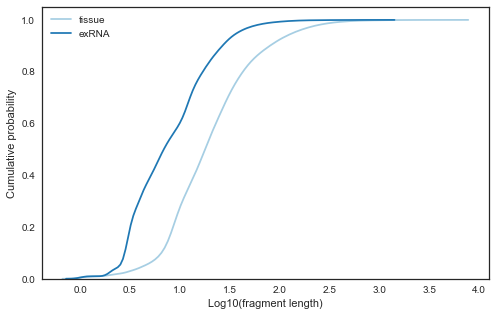

In [10]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(8, 5))
for i, dataset in enumerate(['tissue', 'exRNA']):
    sns.kdeplot(np.log10(peaks_locations[dataset]['length'].values), ax=ax, label=dataset, cumulative=True, 
                color=sns.color_palette("Paired")[i])
ax.set_ylabel('Cumulative probability')
ax.set_xlabel('Log10(fragment length)')
plt.savefig('output/call_peak/compare_fragment_length.pdf')